In [1]:
import pandas as pd
from pathlib import Path
import os

# notebook is inside notebooks/, so project root is one level up
ROOT = Path.cwd().parent
DATA = ROOT / "data" / "processed"

print("cwd:", Path.cwd())
print("ROOT:", ROOT)
print("DATA exists:", DATA.exists())
print("files:", sorted([p.name for p in DATA.glob("*.csv")]))

X_train = pd.read_csv(DATA / "X_train.csv")
y_train = pd.read_csv(DATA / "y_train.csv").iloc[:, 0].astype(int)

X_val = pd.read_csv(DATA / "X_val.csv")
y_val = pd.read_csv(DATA / "y_val.csv").iloc[:, 0].astype(int)

X_train.shape, X_val.shape, y_train.mean(), y_val.mean()

cwd: /Users/marcelorech/Documents/niw-risk-ai/credit-risk-default-prediction/notebooks
ROOT: /Users/marcelorech/Documents/niw-risk-ai/credit-risk-default-prediction
DATA exists: True
files: ['X_test.csv', 'X_train.csv', 'X_val.csv', 'y_test.csv', 'y_train.csv', 'y_val.csv']


((21000, 23),
 (4500, 23),
 np.float64(0.2211904761904762),
 np.float64(0.22111111111111112))

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

baseline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=2000)),
    ]
)

baseline.fit(X_train, y_train)

p_val = baseline.predict_proba(X_val)[:, 1]
p_val[:5]


array([0.217681  , 0.13677964, 0.06349073, 0.16292739, 0.08877525])

In [3]:
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss

roc_auc = roc_auc_score(y_val, p_val)
pr_auc  = average_precision_score(y_val, p_val)
brier   = brier_score_loss(y_val, p_val)

roc_auc, pr_auc, brier


(0.7130253263464255, 0.502922928033571, 0.14572691482026845)

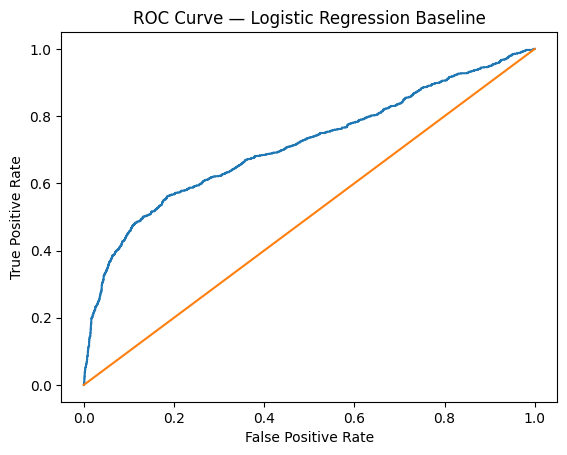

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_val, p_val)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression Baseline")
plt.show()


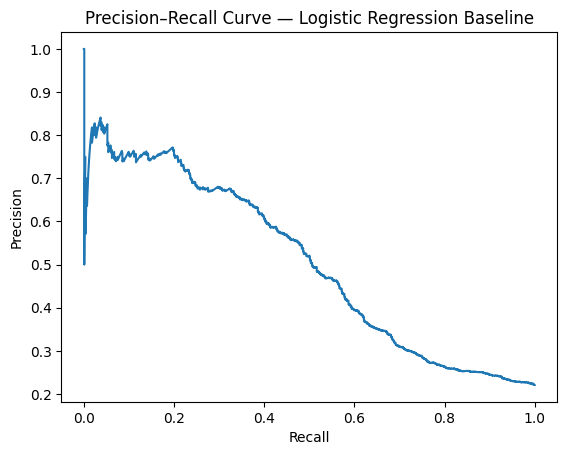

In [8]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_val, p_val)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression Baseline")
plt.show()


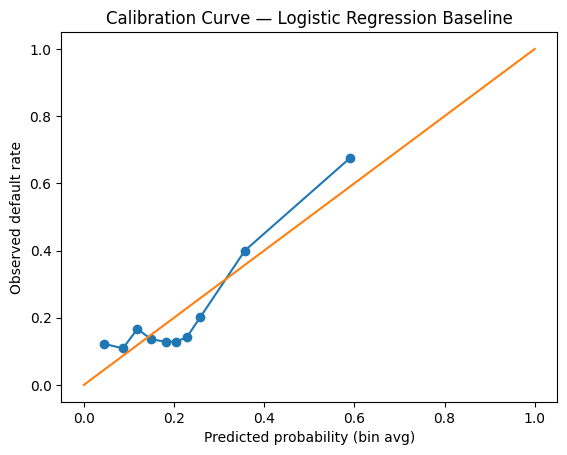

In [9]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_val, p_val, n_bins=10, strategy="quantile")

plt.figure()
plt.plot(prob_pred, prob_true, marker="o")
plt.plot([0, 1], [0, 1])
plt.xlabel("Predicted probability (bin avg)")
plt.ylabel("Observed default rate")
plt.title("Calibration Curve - Logistic Regression Baseline")
plt.show()
